In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!echo                              
!pwd                                              
!ls


/content
drive  sample_data


In [4]:
import os.path
from os import path

In [5]:
if path.exists('/content/drive/MyDrive/Myproject') is False:
   !mkdir '/content/drive/MyDrive/Myproject'        

print (path.exists('/content/drive/MyDrive/Myproject'))

True


In [6]:
if path.exists('/content/drive/MyDrive/Myproject/images') is False:
   !mkdir '/content/drive/MyDrive/Myproject/images'                            
if path.exists('/content/drive/MyDrive/Myproject/video') is False:   
   !mkdir '/content/drive/MyDrive/Myproject/video'
   
print (path.exists('/content/drive/MyDrive/Myproject/images'))   
print (path.exists('/content/drive/MyDrive/Myproject/video'))

True
True


In [7]:
%cd '/content/drive/MyDrive/Myproject/images'
!ls

/content/drive/MyDrive/Myproject/images


In [8]:
%cd '/content/drive/MyDrive/Myproject/video'
!ls

/content/drive/MyDrive/Myproject/video


In [9]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js

from base64 import b64decode
import numpy as np
import io
import PIL

import matplotlib.pyplot as plt

In [10]:
def take_photo(filename=None, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for video to be clicked.
      await new Promise((resolve) => video.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  if filename is None:
    ## return numpy array
    f = io.BytesIO(binary)
    return np.asarray(PIL.Image.open(f))
  else:
    # save file and return length of file
    with open(filename, 'wb') as f:
        f.write(binary)
    return len(binary)


ภาษามือสากล



In [19]:
filename = "/content/drive/MyDrive/Myproject/images/photo01.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33656

ท่า ตัว L

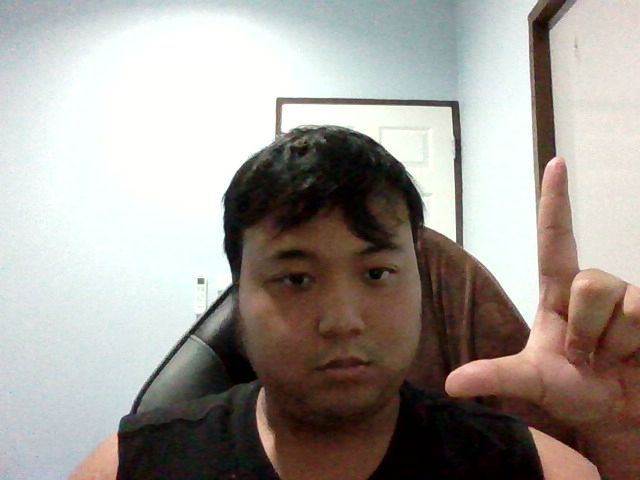

In [20]:
display(Image("/content/drive/MyDrive/Myproject/images/photo01.jpg"))

In [18]:
filename = "/content/drive/MyDrive/Myproject/images/photo02.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33209

ท่า ตัว O

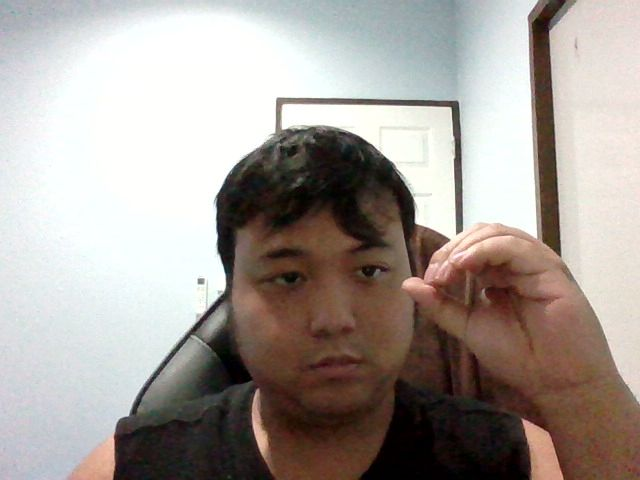

In [21]:
display(Image("/content/drive/MyDrive/Myproject/images/photo02.jpg"))

In [22]:
filename = "/content/drive/MyDrive/Myproject/images/photo03.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33803

### ท่า ตัว V


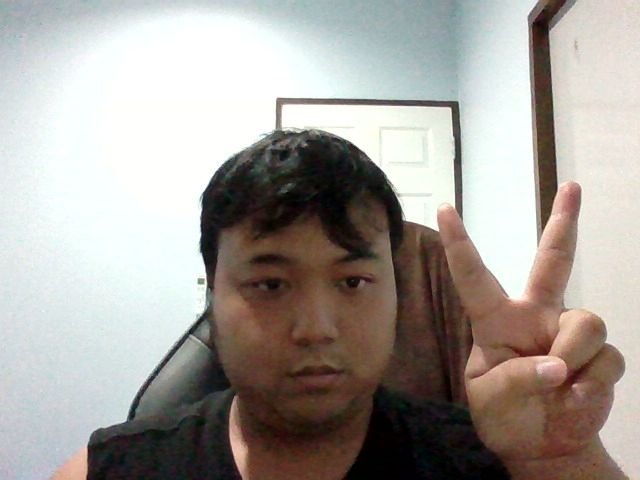

In [23]:
display(Image("/content/drive/MyDrive/Myproject/images/photo03.jpg"))

In [24]:
filename = "/content/drive/MyDrive/Myproject/images/photo04.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

32175

### ท่า ตัว E

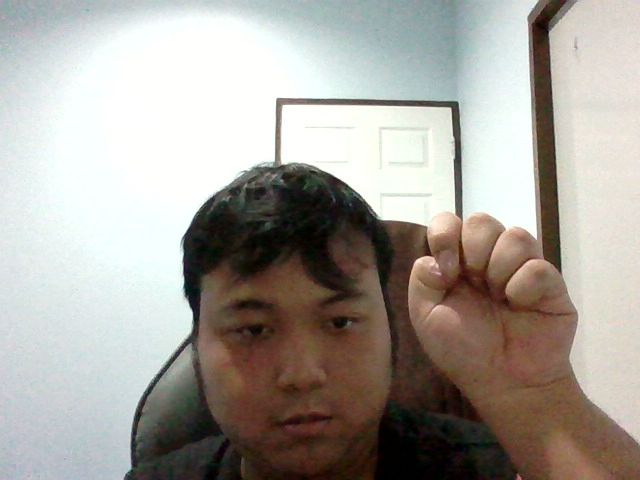

In [25]:
display(Image("/content/drive/MyDrive/Myproject/images/photo04.jpg"))

In [26]:
filename = "/content/drive/MyDrive/Myproject/images/photo05.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33070

### ท่าตัวมือ B

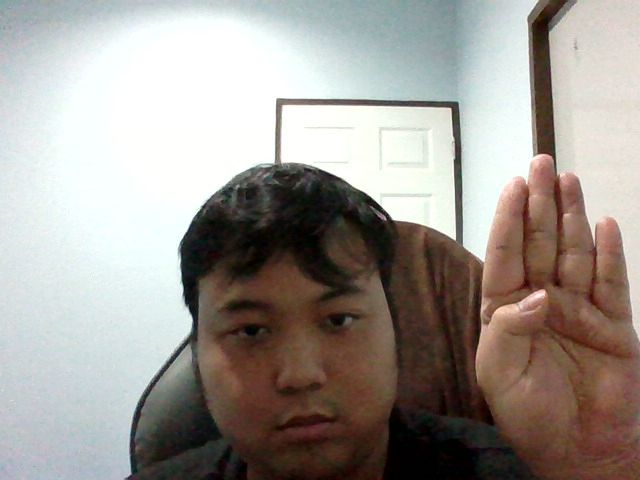

In [27]:
display(Image("/content/drive/MyDrive/Myproject/images/photo05.jpg"))

In [28]:
filename = "/content/drive/MyDrive/Myproject/images/photo06.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33049

## ท่าตัวมือ D

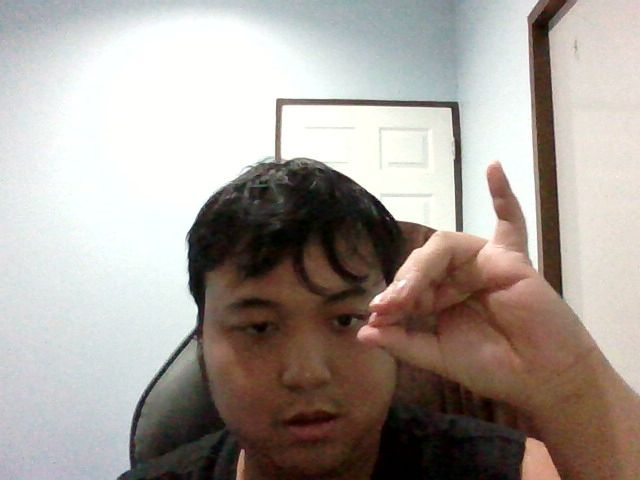

In [29]:
display(Image("/content/drive/MyDrive/Myproject/images/photo06.jpg"))

In [30]:
filename = "/content/drive/MyDrive/Myproject/images/photo07.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33364

## ท่าตัวมือ I

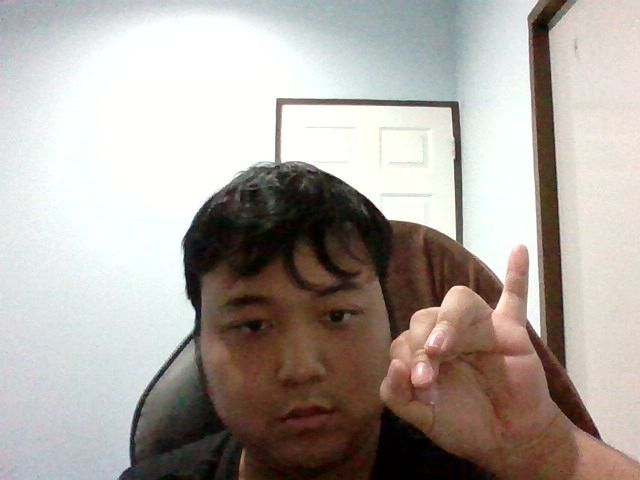

In [31]:
display(Image("/content/drive/MyDrive/Myproject/images/photo07.jpg"))

In [32]:
filename = "/content/drive/MyDrive/Myproject/images/photo08.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33653

## ท่าตัวมือ Q

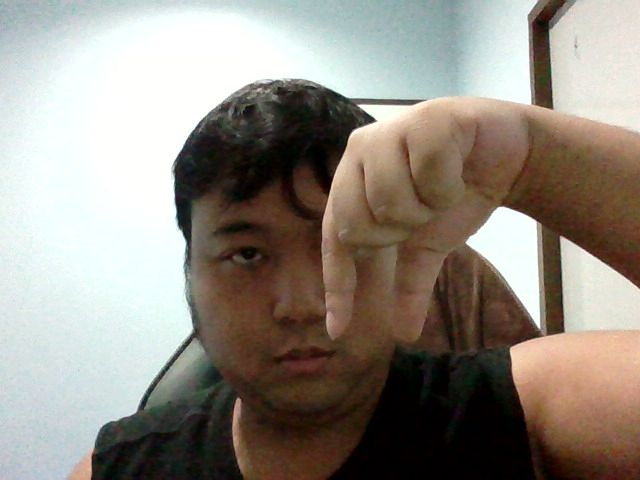

In [33]:
display(Image("/content/drive/MyDrive/Myproject/images/photo08.jpg"))

In [34]:
filename = "/content/drive/MyDrive/Myproject/images/photo09.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

33682

## ท่าตัว R

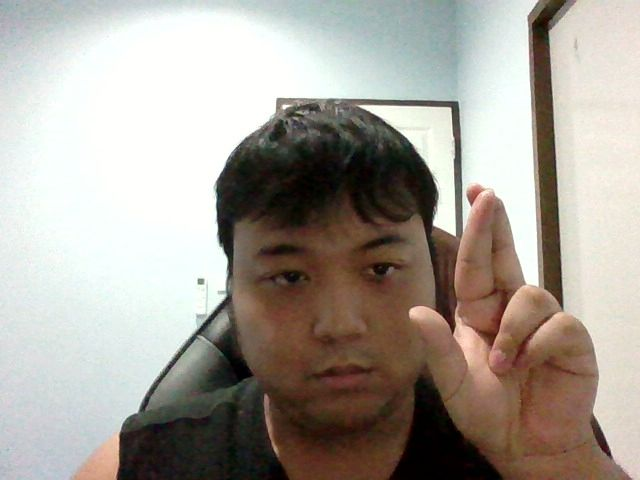

In [35]:
display(Image("/content/drive/MyDrive/Myproject/images/photo09.jpg"))

In [36]:
filename = "/content/drive/MyDrive/Myproject/images/photo10.jpg"
img = take_photo(filename=filename)
img

<IPython.core.display.Javascript object>

34588

## ท่าตัว S

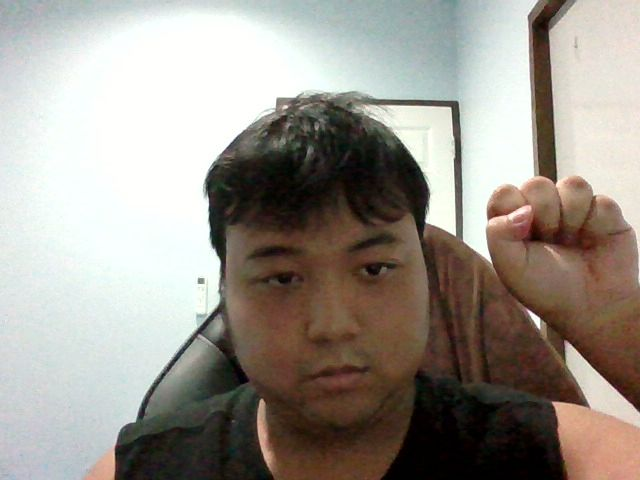

In [37]:
display(Image("/content/drive/MyDrive/Myproject/images/photo10.jpg"))

### VIDEO

In [38]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode
 
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
       
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";
 
      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);
 
      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';
 
      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
     
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
 
      video.srcObject = stream;
      video.muted = true;
 
      await video.play();
 
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
 
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
       
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();
 
      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

### วิดีโอภาษามือ

In [40]:
video_path = "/content/drive/MyDrive/Myproject/video/video01.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video01.mp4


### ท่าขอบคุณ

In [41]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [42]:
video_path = "/content/drive/MyDrive/Myproject/video/video02.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video02.mp4


### ท่ารู้สึกไม่สบาย

In [43]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [44]:
video_path = "/content/drive/MyDrive/Myproject/video/video03.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video03.mp4


### ท่ารู้สึกหิว

In [45]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [46]:
video_path = "/content/drive/MyDrive/Myproject/video/video04.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video04.mp4


### ท่ารัก

In [47]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [48]:
video_path = "/content/drive/MyDrive/Myproject/video/video05.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video05.mp4


### ท่าเศร้า

In [49]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [50]:
video_path = "/content/drive/MyDrive/Myproject/video/video06.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video06.mp4


### ท่าอิ่ม

In [51]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [52]:
video_path = "/content/drive/MyDrive/Myproject/video/video07.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video07.mp4


ท่าเข้าใจ

In [53]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [55]:
video_path = "/content/drive/MyDrive/Myproject/video/video08.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video08.mp4


### ท่าไม่ชอบ

In [56]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [57]:
video_path = "/content/drive/MyDrive/Myproject/video/video09.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video09.mp4


### ท่าสวย

In [58]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [59]:
video_path = "/content/drive/MyDrive/Myproject/video/video10.mp4"
record_video(video_path)

<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Myproject/video/video10.mp4


### คิดถึง

In [60]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)